In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import copy
import matplotlib.pyplot as plt  
import scipy.cluster.hierarchy as shc
%matplotlib inline

In [6]:
COUNTRIES =['Argentina','Australia','Austria','Belgium','Bolivia: Plurinational State of','Brazil','Canada','Chile','Colombia',
 'Costa Rica','Czech Republic','Denmark','Dominican Republic','Ecuador','El Salvador','Estonia','Finland','France','Germany',
 'Greece','Guatemala','Honduras','Hong Kong','Hungary','Iceland','Indonesia','Ireland','Italy','Japan','Latvia','Lithuania',
 'Luxembourg','Malaysia','Mexico','Netherlands','New Zealand','Norway','Panama','Paraguay','Peru','Philippines','Poland',
 'Portugal','Singapore','Slovakia','Spain','Sweden','Switzerland','Taiwan: Province of China','Turkey',
 'United Kingdom of Great Britain and Northern Ireland','United States of America','Uruguay']

In [7]:
data_set = pd.read_csv('top_hits_processed_dataset.csv',encoding = 'utf-8')
data_set_countries_only = data_set[COUNTRIES]
countries_with_labels = data_set_countries_only.transpose()
countries_with_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,21725,21726,21727,21728,21729,21730,21731,21732,21733,21734
Argentina,0.011534,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,...,0.000056,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0
Australia,0.168959,-1.0,-1.0,-1.0,-1.0,0.000136,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,0.001342,-1.0
Austria,0.027543,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000147,-1.000000,-1.0
Belgium,0.064163,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000038,0.000490,-1.0
Bolivia: Plurinational State of,0.003637,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0


we can see that all the countries has ranks for at least 250 songs, so we will not remove any countries before clustering them:

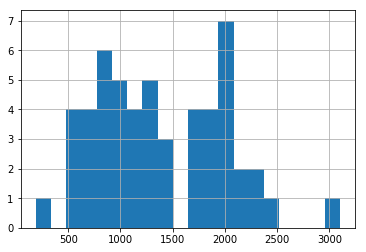

In [8]:
countries_with_labels["nonzeros"] = countries_with_labels.gt(-1).sum(axis=1)
countries_with_labels.nonzeros.hist(bins=20)

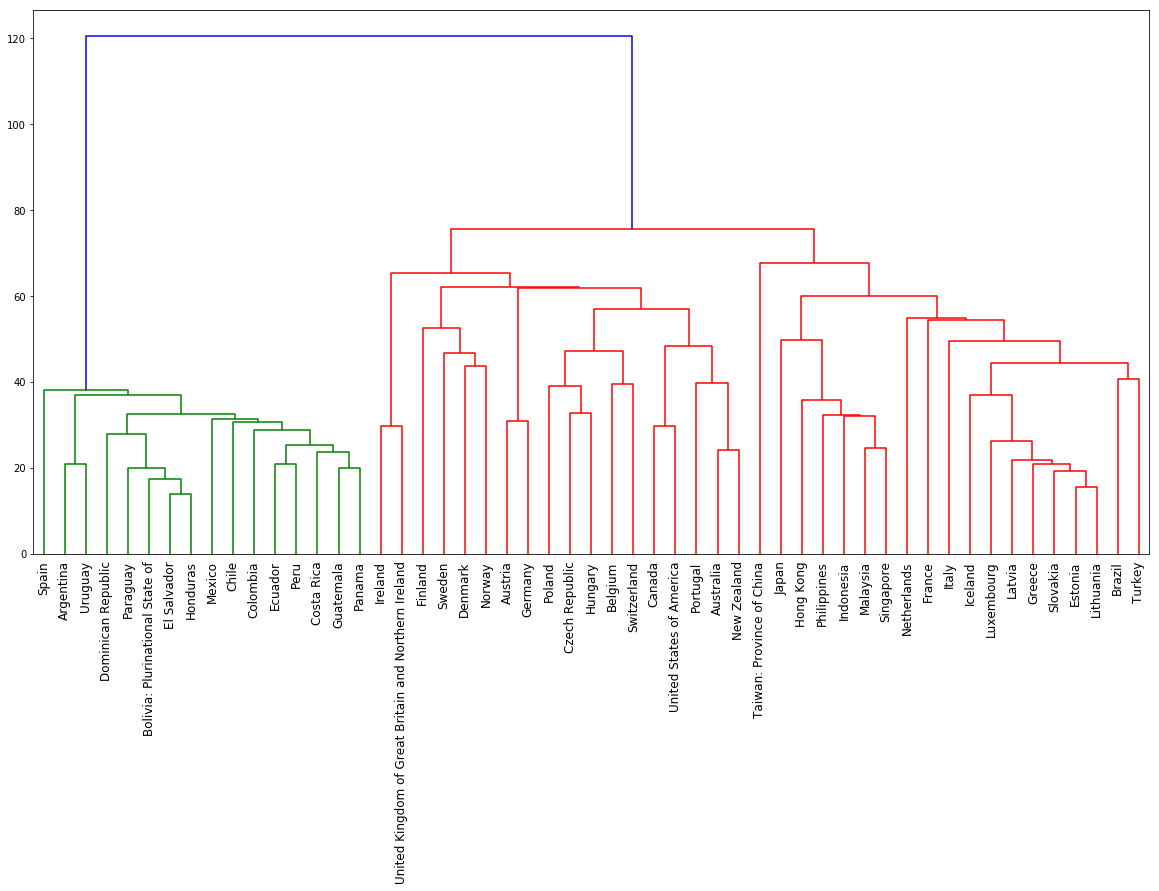

In [9]:
X = copy.deepcopy(countries_with_labels.drop(['nonzeros'], axis=1))
plt.figure(figsize=(20, 10))  
dend = shc.dendrogram(shc.linkage(X, method='ward'),labels =countries_with_labels.index,leaf_font_size =12,color_threshold = 100)  

using the dendogram, it's easier to pick the number of clusters:

In [10]:
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)
countries_with_labels["labels_AgglomerativeClustering"] = cluster.labels_

the clusters we got are:

In [11]:
countries_with_labels[countries_with_labels.labels_AgglomerativeClustering==0].index

Index(['Brazil', 'Estonia', 'France', 'Greece', 'Hong Kong', 'Iceland',
       'Indonesia', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malaysia', 'Netherlands', 'Philippines', 'Singapore', 'Slovakia',
       'Turkey'],
      dtype='object')

In [12]:
countries_with_labels[countries_with_labels.labels_AgglomerativeClustering==1].index

Index(['Argentina', 'Bolivia: Plurinational State of', 'Chile', 'Colombia',
       'Costa Rica', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Guatemala', 'Honduras', 'Mexico', 'Panama', 'Paraguay', 'Peru',
       'Spain', 'Uruguay'],
      dtype='object')

In [13]:
countries_with_labels[countries_with_labels.labels_AgglomerativeClustering==2].index

Index(['Australia', 'Belgium', 'Canada', 'Czech Republic', 'Hungary',
       'New Zealand', 'Poland', 'Portugal', 'Switzerland',
       'United States of America'],
      dtype='object')

In [14]:
countries_with_labels[countries_with_labels.labels_AgglomerativeClustering==3].index

Index(['Taiwan: Province of China'], dtype='object')

In [15]:
countries_with_labels[countries_with_labels.labels_AgglomerativeClustering==4].index

Index(['Ireland', 'United Kingdom of Great Britain and Northern Ireland'], dtype='object')

In [16]:
countries_with_labels[countries_with_labels.labels_AgglomerativeClustering==5].index

Index(['Denmark', 'Finland', 'Norway', 'Sweden'], dtype='object')

In [17]:
countries_with_labels[countries_with_labels.labels_AgglomerativeClustering==6].index

Index(['Austria', 'Germany'], dtype='object')

we can recall the clusters we got with the prevoius dataset (the one containing random songs), and see that the clustering are not very similar... some make perfect sense like [Denmark', 'Finland', 'Norway', 'Sweden'] or ['Austria', 'Germany']  or ['Ireland', 'United Kingdom of Great Britain and Northern Ireland']. others are not so obvious - it's srprising the that Greece and Japan, for example, are in the same cluster.